# Ordenamos los conceptos


* Campo de estudio de la IA
    * Paradigmas de IA
        * Tipo de Problema a resolver
            * Algoritmos de IA

# Intro a IA

* Inteligencia Artificial
* Machine Learning
* Redes Neuronales: Deep Learning

<br>
<img src="imagenes/ia_clas.png" width=400 style="float:left;">
<img src="imagenes/ia_clas3.webp" width=400 style="float:left;margin-top:-40px;margin-left:40px;">

# Paradigmas

* Aprendizaje Supervisado
    * Necesita datos "etiquetados" (diario del lunes)
    * Se entrena un modelo para poder predecir
    
    
* Aprendizaje No-Supervisado
    * No se "entrena", hace un análisis "indirecto"
    * No predice, sino que mas bien: separa, organiza etc..
    
    
* Aprendizaje Reforzado
    * Se basa en recompensas
    * El aprendizaje es adaptativo
    * Ambientes dinámicos y cambiantes
    * El Output son las "acciones" que llevan a la meta

<img src="imagenes/ia_clas2.png" width=800>

# Tipos de problemas a resolver

* Regresión
* Clasificación
* Agrupamiento
* Reducción de Dimensionalidad

## Ejemplo: Regresión

* input => Output
* 1 => 3
* 2 => 5
* 3 => 7
* 4 => 9


* 10 => ???   por que 21?  que tipo de algo es?

* input => Output
* 1 => 3.01
* 2 => 4.97
* 3 => 6.98
* 4 => 9.04


* 10 => ??? 21 +/- 0.04??

## Ejemplo clasificación

* input => Output
* 1 => impar
* 2 => par
* 3 => impar
* 4 => par


* 10 => ???   que tipo de algoritmo es?

## Ejemplo Agrupamiento

Ejemplo envolventes alcistas/bajistas de algo de agrupamiento no supervisado

INPUT = <img src='imagenes/clase_16_paradigmas_tot.png' width="480">

OUTPUT =

<img src='imagenes/clase_16_paradigmas_a.png' width="480" style="float:left;border: 1px solid #000">
<img src='imagenes/clase_16_paradigmas_b.png' width="480"  style="float:left;border: 1px solid #000"">

#  Algos de Aprendizaje Supervisado

* Algos de Clasificacion:
    * Regresión Logística
    * Arboles de Decisión
    * Vectores de soporte (SVM)
    * Bosques Aleatorios
    * Naive Bayes
    
    
* Algos de Regresión
    * Regresión lineal simple
    * Regresion lineal múltiple
    * Regresiones polinomiales
    * e infinidad mas..
    
    


# Algos de aprendizaje No supervisado

* Algos de Agrupamiento
    * Clustering jerárquico
    * K-means
    * Mezclas Gaussianas
    * Mean Shift
    * DB Scan
   
   
* Algos de reduccion de dimensionalidad
    * PCA Análisis de componentes principales 
    * SVD Descomposición de Valor Singular
    * Otros tipo incrustacion escalado etc,  LDA, Isomap, LLE
    

# Algos de Aprendizaje Reforzado

    
    
* Algos de NLP
* Manejo autonomo

Características:

* El output es una secuencia de acciones
* Hay un desafío a resolver un problema concreto (meta)
* El aprendizaje es adaptativo (algo asi como acumulativo, el agente evoluciona paso a paso de su experiencia)

Estructuras de la interacción Agente-Acciones-Ambiente-Recomensa--Estados de este paradigma:
    
    * Recompensas:
        * Positivas y Negativas:
        * Escasas o abundantes
        * Explícitas o implícitas
    * Ambientes:
        * Cambiantes/diversos o con similitudes
        * Con alto o bajo grado de aleatoriedad
        * Observables total o parcial
    * Acciones:
        * Con o sin parámetros
        * Con o sin conocimiento de variables endógenas
        * Con o sin variables exógenas (deterministas o estocásticas)

# Research previo a regresíon múltiple

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

medias = ((4, 18),(18,40),(50,200))
ventana = 60

data = yf.download('GGAL', start='2000-01-01')

dif = data['Adj Close'].diff()
win = pd.DataFrame(np.where(dif > 0, dif, 0))
loss = pd.DataFrame(np.where(dif < 0, abs(dif), 0))
ema_win = win.ewm(alpha=1/14).mean()
ema_loss = loss.ewm(alpha=1/14).mean()
rs = ema_win / ema_loss
rsi = 100 - (100 / (1 + rs))
rsi.index = data.index

data['pctChange'] = data['Adj Close'].pct_change()
data['fw'] = np.log(data['Adj Close'].shift(-ventana)/data['Adj Close'])
data['rsi'] = rsi/100
data['roll_vol'] = data['pctChange'].rolling(40).std() * 40**0.5
data['ema_vol'] = data['pctChange'].ewm(span=250).std() * 250**0.5
data['cruce_1'] = data['Adj Close'].rolling(medias[0][0]).mean()/data['Adj Close'].rolling(medias[0][1]).mean()-1
data['cruce_2'] = data['Adj Close'].rolling(medias[1][0]).mean()/data['Adj Close'].rolling(medias[1][1]).mean()-1
data['cruce_3'] = data['Adj Close'].rolling(medias[2][0]).mean()/data['Adj Close'].rolling(medias[2][1]).mean()-1
data.dropna(inplace=True)

df = data.iloc[:, 7:]
df

[*********************100%***********************]  1 of 1 completed


,fw,rsi,roll_vol,ema_vol,cruce_1,cruce_2,cruce_3
Date,,,,,,,
2001-05-09,-0.430287,0.516746,0.297384,0.618240,0.036434,-0.000609,-0.016668
2001-05-10,-0.455128,0.515172,0.293578,0.615146,0.033961,0.000497,-0.015706
2001-05-11,-0.418446,0.486459,0.294509,0.613205,0.021255,0.000212,-0.015089
2001-05-14,-0.370281,0.461820,0.291634,0.611068,0.018622,-0.006122,-0.015328
2001-05-15,-0.339663,0.485499,0.285509,0.608699,0.013275,-0.009030,-0.018009
...,...,...,...,...,...,...,...
2021-03-29,0.240919,0.445006,0.183891,0.657146,-0.010493,-0.024925,-0.110588
2021-03-30,0.222346,0.475191,0.176383,0.654864,-0.011082,-0.022250,-0.109791
2021-03-31,0.197813,0.453460,0.176478,0.652444,-0.014233,-0.018274,-0.108812


## Gráficos especiales

### Multicolinealidad 

In [2]:
df.corr().round(2)

,fw,rsi,roll_vol,ema_vol,cruce_1,cruce_2,cruce_3
fw,1.00,0.13,0.12,0.23,0.11,0.14,0.17
rsi,0.13,1.00,-0.08,0.05,0.78,0.62,0.26
roll_vol,0.12,-0.08,1.00,0.73,-0.01,-0.18,-0.43
ema_vol,0.23,0.05,0.73,1.00,0.09,0.07,-0.08
cruce_1,0.11,0.78,-0.01,0.09,1.00,0.45,0.16
cruce_2,0.14,0.62,-0.18,0.07,0.45,1.00,0.37
cruce_3,0.17,0.26,-0.43,-0.08,0.16,0.37,1.00


<AxesSubplot:>

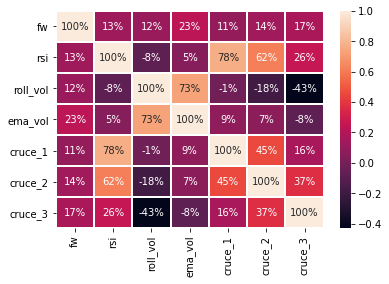

In [3]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True, fmt='.0%', linewidths=1)

### Matriz de correlaciones e histogramas

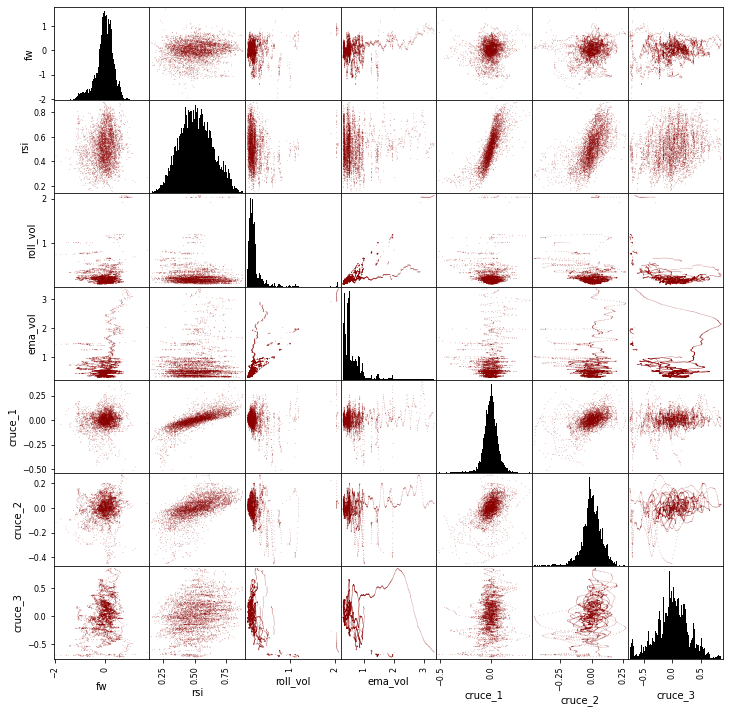

In [4]:
%matplotlib inline

pd.plotting.scatter_matrix(df, diagonal='hist', figsize=(12,12), c='darkred'
                           ,alpha=0.5, s=2, hist_kwds={'bins':100, 'color':'k'})
plt.show()

### Layout de histogramas

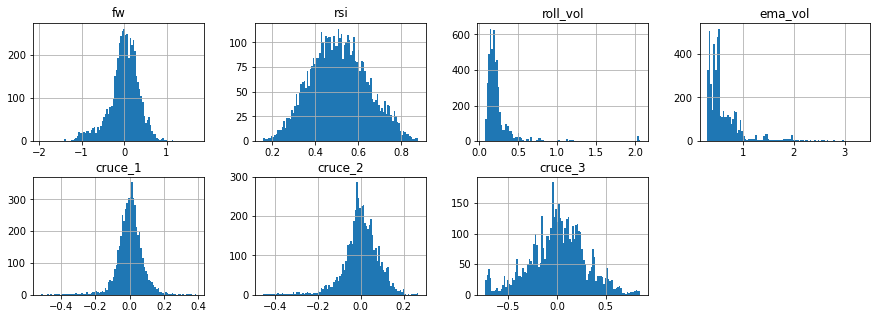

In [5]:
pd.plotting.hist_frame(df, layout=(2,4), figsize=(15,5), bins=100)
plt.show()

### Layout de boxplots

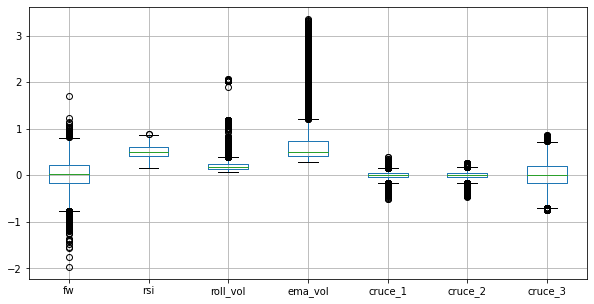

In [6]:
pd.plotting.boxplot_frame(df, figsize=(10,5))
plt.show()

### Layout de boxplots agrupados

En este caso agrupamos por régimen de volatilidad pasada, a modo de ejemplo

In [7]:
df.loc[df.roll_vol <= 0.35, 'vol_rango'] = 'baja'
df.loc[(df.roll_vol > 0.35) & (df.roll_vol <= 0.6) , 'vol_rango'] = 'media'
df.loc[df.roll_vol > 0.6, 'vol_rango'] = 'alta'
df   #df.cut

,fw,rsi,roll_vol,ema_vol,cruce_1,cruce_2,cruce_3,vol_rango
Date,,,,,,,,
2001-05-09,-0.430287,0.516746,0.297384,0.618240,0.036434,-0.000609,-0.016668,baja
2001-05-10,-0.455128,0.515172,0.293578,0.615146,0.033961,0.000497,-0.015706,baja
2001-05-11,-0.418446,0.486459,0.294509,0.613205,0.021255,0.000212,-0.015089,baja
2001-05-14,-0.370281,0.461820,0.291634,0.611068,0.018622,-0.006122,-0.015328,baja
2001-05-15,-0.339663,0.485499,0.285509,0.608699,0.013275,-0.009030,-0.018009,baja
...,...,...,...,...,...,...,...,...
2021-03-29,0.240919,0.445006,0.183891,0.657146,-0.010493,-0.024925,-0.110588,baja
2021-03-30,0.222346,0.475191,0.176383,0.654864,-0.011082,-0.022250,-0.109791,baja
2021-03-31,0.197813,0.453460,0.176478,0.652444,-0.014233,-0.018274,-0.108812,baja


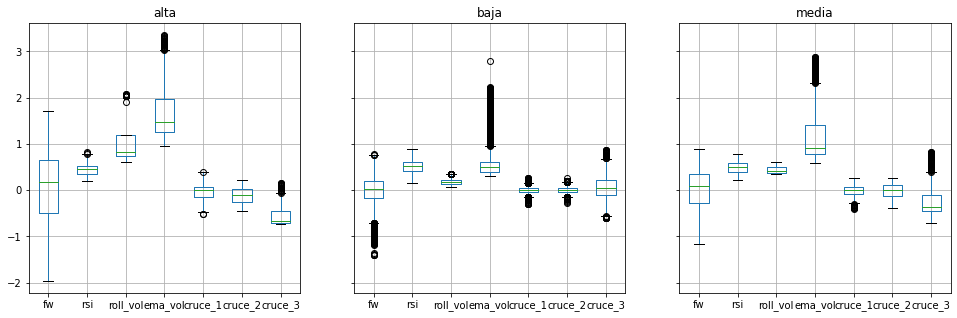

In [8]:
pd.plotting.boxplot_frame_groupby(df.groupby('vol_rango'), figsize=(16,5), layout=(1,3))
plt.show()

### Lag Plots y plots de Autocorrelación

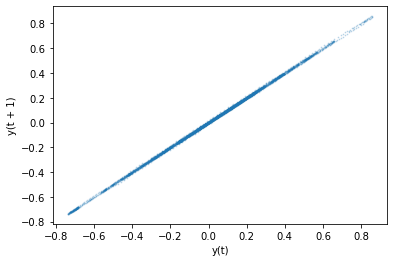

In [9]:
%matplotlib inline
pd.plotting.lag_plot(df.loc[:,['cruce_3']], lag=1, s=.5, alpha=.25)
plt.show()

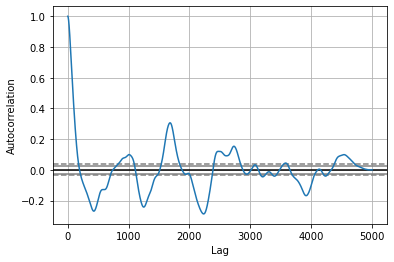

In [10]:
fig, ejes = plt.subplots()

pd.plotting.autocorrelation_plot(df['cruce_3'], ax=ejes)

#ejes.set_xlim(0,500)
#ejes.set_ylim(-0.35,0.35)

plt.show()

# Regresion multivariable

## Formuleo

con ustedes el modelo:

$$ \Large y_{i}= \beta _{0}+\beta _{1}x_{1} +\beta _{2}x_{2} +\beta _{3}x_{3}  +\cdots +\beta _{i}x_{i}+\varepsilon _{i} $$

se acuerdan a lo que nos llevo la regresión lineal simple?

$$ \large h(x_i) = \beta _0 + \beta_1x_i  $$

<img src='imagenes/regresion.svg'>

$$ \large  y_i = \beta_0 + \beta_1x_i + \varepsilon_i = h(x_i) + \varepsilon_i \Rightarrow \varepsilon_i = y_i -h(x_i)  $$

$$ \large \beta_1 = \frac{SS_{xy}}{SS_{xx}} $$

$$ \large \beta_0 = \bar{y} - \beta_1\bar{x} $$

$$ \large  SS_{xy} = \sum_{i=1}^{n} (x_i-\bar{x})(y_i-\bar{y}) =  \sum_{i=1}^{n} y_ix_i - n\bar{x}\bar{y} $$

$$ \large SS_{xx} = \sum_{i=1}^{n} (x_i-\bar{x})^2 =  \sum_{i=1}^{n}x_i^2 - n(\bar{x})^2 $$

# Supuestos para una regresión multivariable

* Linealidad de las variables (regplot)
* Independencia/Autocorrelacion de residuos (Durbin/Watson)
* Normalidad en los residuos  (test Omnibus c/Kurtosis/skew, Test Shapiro-Wilk etc, qqplot)
* Homocedasticidad (Varianza constante)
* No existe multicolinealidad  (heatmap de correlacion entre predictores)
* No hay exogeneidad o es debil

<img src='imagenes/math1.gif' width=400 style="float:left;margin-right:20px;">
<img src='imagenes/math3.png' width=400 style="float:left;margin-right:20px;margin-top:0px">

## Uso de statsmodels

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

medias = ((4, 18),(18,40),(50,200))
ventana = 100

data = yf.download('GGAL', start='2000-01-01')

dif = data['Adj Close'].diff()
win = pd.DataFrame(np.where(dif > 0, dif, 0))
loss = pd.DataFrame(np.where(dif < 0, abs(dif), 0))
ema_win = win.ewm(alpha=1/14).mean()
ema_loss = loss.ewm(alpha=1/14).mean()
rs = ema_win / ema_loss
rsi = 100 - (100 / (1 + rs))
rsi.index = data.index

data['pctChange'] = data['Adj Close'].pct_change()
data['fw'] = np.log(data['Adj Close'].shift(-ventana)/data['Adj Close'])
data['rsi'] = rsi/100
data['roll_vol'] = data['pctChange'].rolling(40).std() * 40**0.5
data['ema_vol'] = data['pctChange'].ewm(span=250).std() * 250**0.5
data['cruce_1'] = data['Adj Close'].rolling(medias[0][0]).mean()/data['Adj Close'].rolling(medias[0][1]).mean()-1
data['cruce_2'] = data['Adj Close'].rolling(medias[1][0]).mean()/data['Adj Close'].rolling(medias[1][1]).mean()-1
data['cruce_3'] = data['Adj Close'].rolling(medias[2][0]).mean()/data['Adj Close'].rolling(medias[2][1]).mean()-1
data.dropna(inplace=True)

df = data.iloc[:, 7:]
df

[*********************100%***********************]  1 of 1 completed


,fw,rsi,roll_vol,ema_vol,cruce_1,cruce_2,cruce_3
Date,,,,,,,
2001-05-09,-1.131402,0.516746,0.297384,0.618240,0.036434,-0.000609,-0.016668
2001-05-10,-1.160570,0.515172,0.293578,0.615146,0.033961,0.000497,-0.015706
2001-05-11,-1.122710,0.486459,0.294509,0.613205,0.021255,0.000212,-0.015089
2001-05-14,-1.021276,0.461820,0.291634,0.611068,0.018622,-0.006122,-0.015328
2001-05-15,-0.937754,0.485499,0.285509,0.608699,0.013275,-0.009030,-0.018009
...,...,...,...,...,...,...,...
2021-01-29,0.258195,0.379826,0.171103,0.719375,-0.029096,-0.061220,-0.051317
2021-02-01,0.201780,0.469061,0.177546,0.720609,-0.024303,-0.059880,-0.053248
2021-02-02,0.175720,0.454961,0.177181,0.717862,-0.018419,-0.060057,-0.054451


H0 = Es que la correlacion de todas las variables independientes (cruces y roll_vol) que explican la dependiente (fw) es cero

In [12]:
# Tests de hipotesis

# partimos de una idea que llamamos H0 (mainstream) y vamos a ver que tan probable es eso o si lo tenemos que descartar esa idea

In [14]:
from statsmodels.formula.api import ols

reg = ols('fw ~  roll_vol + ema_vol  + cruce_1 + cruce_2 + cruce_3 + rsi'  , data=df).fit()

residuos = reg.resid
predicciones = reg.predict()

print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                     fw   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     123.5
Date:                Tue, 29 Jun 2021   Prob (F-statistic):          5.39e-146
Time:                        17:38:31   Log-Likelihood:                -3164.2
No. Observations:                4967   AIC:                             6342.
Df Residuals:                    4960   BIC:                             6388.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3571      0.047     -7.584      0.0

## Chequeos

### Linealidad de estimaciones vs muestra

<AxesSubplot:ylabel='fw'>

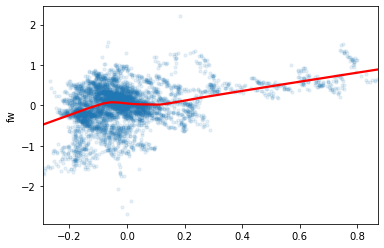

In [15]:
import seaborn as sns

sns.regplot(x=predicciones, y=df.fw, lowess=True, scatter_kws={'s':10, 'alpha':0.1}, line_kws={'color':'red'})

### Independencia de los errores

In [18]:
from statsmodels.stats.stattools import durbin_watson

# H0 => No hay auto-correlacion de los residuos
durbin_watson(residuos)

0.027563329351702637

### Verificacion de normalidad residuos


In [19]:
from scipy import stats

# Shapiro y normaltest: H0 => Normalidad
stats.normaltest(residuos), stats.shapiro(residuos)

(NormaltestResult(statistic=386.76291732998635, pvalue=1.0363336484804272e-84),
 ShapiroResult(statistic=0.9740492105484009, pvalue=3.9403022029393793e-29))

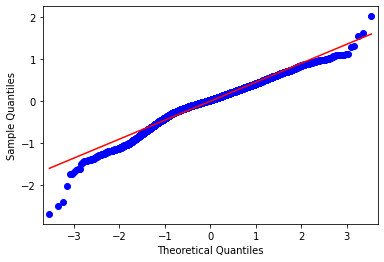

In [20]:
# Verificacion de normalidad residuos
from statsmodels.api import qqplot

qqplot(residuos, line='r')
plt.show()

### Prueba de multicolinealidad

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.iloc[:,1:]
cols = X.columns
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

pd.DataFrame(zip(cols, vif), columns=['feature','VIF']).set_index('feature')

,VIF
feature,
rsi,3.101718
roll_vol,7.020245
ema_vol,7.784668
cruce_1,1.316843
cruce_2,1.484724
cruce_3,1.534561


<AxesSubplot:>

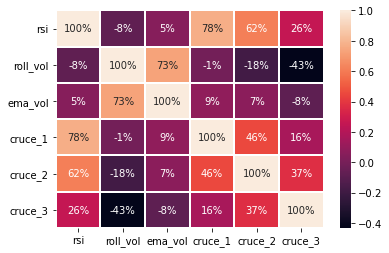

In [22]:
import seaborn as sns

sns.heatmap(df.iloc[:,1:].corr(), annot=True, fmt='.0%', linewidths=1)

### Verificacion de homocedasticidad

<AxesSubplot:>

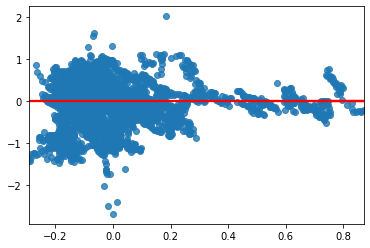

In [23]:
import seaborn as sns

sns.regplot(x=predicciones, y=residuos, line_kws={'color':'red'})

In [24]:
from statsmodels.stats.diagnostic import het_white

df['cte'] = 1  # (El modelo necesita una columna cte)

# H0 => la varianza de los residuos es independiente (homocedasticidad)
p_val_homocedasticidad = het_white(residuos, df.iloc[:,1:])
p_val_homocedasticidad[-2:]

(46.63964266540413, 9.454234946602943e-220)

In [25]:
stats.levene(predicciones, residuos)

LeveneResult(statistic=2327.3934013259463, pvalue=0.0)

In [26]:
stats.bartlett(predicciones, residuos)

BartlettResult(statistic=3938.71804327108, pvalue=0.0)

In [27]:
stats.fligner(predicciones, residuos)

FlignerResult(statistic=2335.740788628052, pvalue=0.0)

## Ensayo de pre-sensibilidad 

In [28]:
fast = np.random.randint(10,40, size=3)
slow = fast + np.random.randint(10,500, size=3)
list(zip(fast,slow))

[(14, 483), (26, 142), (27, 375)]

### Montecarlo con StatsModel: OLS/GLS

[*********************100%***********************]  1 of 1 completed
100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 50.43it/s]
     index        r2                             medias  sigma_f  sigma_s
0      999  0.164549   [(27, 338), (39, 86), (75, 351)]       57      391
1       74  0.161324  [(44, 276), (96, 594), (25, 246)]       59      319
2      589  0.160482  [(82, 302), (79, 395), (66, 545)]       51      423
3      828  0.160107  [(22, 244), (74, 145), (65, 130)]       48      483
4      346  0.159109  [(85, 220), (61, 431), (84, 581)]       75      253
..     ...       ...                                ...      ...      ...
995    653  0.086460  [(68, 342), (14, 395), (48, 276)]      104      203
996    889  0.085478  [(11, 280), (99, 172), (15, 345)]      118      220
997    421  0.084735  [(42, 205), (24, 334), (24, 231)]      117      200
998    765  0.082860  [(77, 304), (52, 479), (27, 421)]      119      2

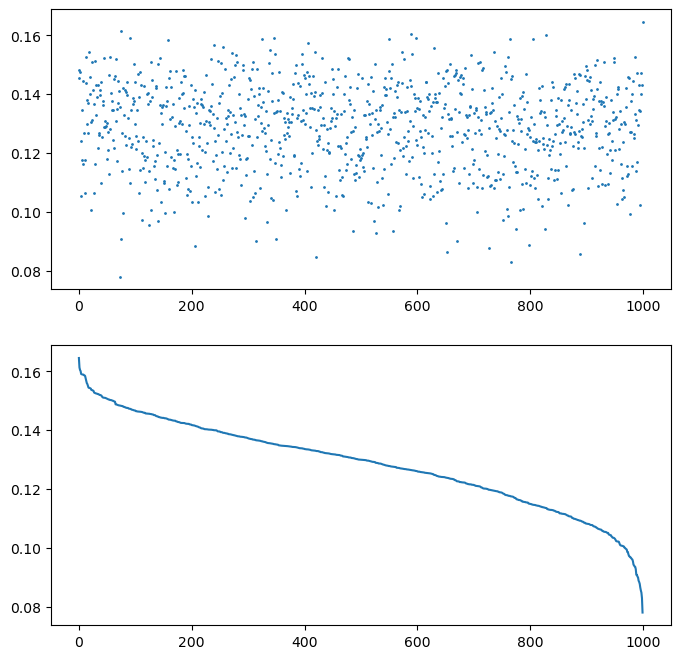

In [29]:
import statsmodels.formula.api as sm
import yfinance as yf
import numpy as np
import pandas as pd
import time, threading, sys, tqdm
import matplotlib.pyplot as plt

iteraciones = 1000
fw_window = 100

data = yf.download('BBAR', start='2000-01-01')
dif = data['Adj Close'].diff()
win = pd.DataFrame(np.where(dif > 0, dif, 0))
loss = pd.DataFrame(np.where(dif < 0, abs(dif), 0))
ema_win = win.ewm(alpha=1/14).mean()
ema_loss = loss.ewm(alpha=1/14).mean()
rs = ema_win / ema_loss
rsi = 100 - (100 / (1 + rs))
rsi.index = data.index

data['pctChange'] = data['Adj Close'].pct_change()
data['fw'] = np.log(data['Adj Close'].shift(-fw_window)/data['Adj Close'])  # logaritmico
data['fw'] = (data['Adj Close'].shift(-fw_window) / data['Adj Close'])-1  # lineal
data['rsi'] = rsi/100

results = []
with tqdm.tqdm(total=iteraciones, file=sys.stdout) as pbar:
    for i in range(iteraciones):
        pbar.update()

        fast = np.random.randint(10,100, size=3)
        slow = fast + np.random.randint(10,500, size=3)
        medias = list(zip(fast,slow))
        sigma_f = np.random.randint(40,120)
        sigma_s = np.random.randint(200,500)
        data['roll_vol'] = data['pctChange'].rolling(sigma_f).std() * sigma_f**0.5
        data['ema_vol'] = data['pctChange'].ewm(span=sigma_s).std() * sigma_s**0.5        
        data['cruce_1'] = data['Adj Close'].rolling(medias[0][0]).mean()/data['Adj Close'].rolling(medias[0][1]).mean()-1
        data['cruce_2'] = data['Adj Close'].rolling(medias[1][0]).mean()/data['Adj Close'].rolling(medias[1][1]).mean()-1
        data['cruce_3'] = data['Adj Close'].rolling(medias[2][0]).mean()/data['Adj Close'].rolling(medias[2][1]).mean()-1
        df = data.iloc[:, 7:]
        
        reg = ols('fw ~  roll_vol + ema_vol + cruce_1 + cruce_2 + cruce_3 + rsi'  , data=df).fit()
        r2 = reg.rsquared
        results.append({'r2':r2, 'medias':medias, 'sigma_f':sigma_f, 'sigma_s':sigma_s})
    
res = pd.DataFrame(results)
    
plt.style.use('default')
fig, ax = plt.subplots(figsize=(8,8), nrows=2)
ax[0].scatter(res.index, res.r2, s=1)

top = res.sort_values('r2',ascending=False).reset_index()
print(top)
ax[1].plot(top.r2)

In [30]:
top

,index,r2,medias,sigma_f,sigma_s
0,999,0.164549,"[(27, 338), (39, 86), (75, 351)]",57,391
1,74,0.161324,"[(44, 276), (96, 594), (25, 246)]",59,319
2,589,0.160482,"[(82, 302), (79, 395), (66, 545)]",51,423
3,828,0.160107,"[(22, 244), (74, 145), (65, 130)]",48,483
4,346,0.159109,"[(85, 220), (61, 431), (84, 581)]",75,253
...,...,...,...,...,...
995,653,0.086460,"[(68, 342), (14, 395), (48, 276)]",104,203
996,889,0.085478,"[(11, 280), (99, 172), (15, 345)]",118,220
997,421,0.084735,"[(42, 205), (24, 334), (24, 231)]",117,200
998,765,0.082860,"[(77, 304), (52, 479), (27, 421)]",119,209


In [31]:
top.r2.quantile(0.9)

0.14666781750650656

<AxesSubplot:>

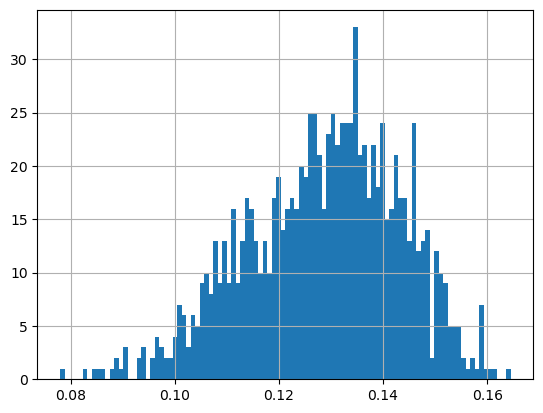

In [32]:
top.r2.hist(bins=100)

### Análisis de los resultados mejor simulacion

In [33]:
import statsmodels.formula.api as sm
import yfinance as yf

data = yf.download('BBAR', start='2000-01-01')
dif = data['Adj Close'].diff()
win = pd.DataFrame(np.where(dif > 0, dif, 0))
loss = pd.DataFrame(np.where(dif < 0, abs(dif), 0))
ema_win = win.ewm(alpha=1/14).mean()
ema_loss = loss.ewm(alpha=1/14).mean()
rs = ema_win / ema_loss
rsi = 100 - (100 / (1 + rs))
rsi.index = data.index

data['pctChange'] = data['Adj Close'].pct_change()
data['fw'] = np.log(data['Adj Close'].shift(-fw_window)/data['Adj Close'])  # logaritmico
data['fw'] = (data['Adj Close'].shift(-fw_window) / data['Adj Close'])-1  # lineal
data['rsi'] = rsi/100


# Tomo los valores de la mejor simulacion
medias = top[:1].medias[0]
sigma_f = top[:1].sigma_f[0]
sigma_s = top[:1].sigma_s[0]

# Calculo
data['cruce_1'] = data['Adj Close'].rolling(medias[0][0]).mean()/data['Adj Close'].rolling(medias[0][1]).mean()-1
data['cruce_2'] = data['Adj Close'].rolling(medias[1][0]).mean()/data['Adj Close'].rolling(medias[1][1]).mean()-1
data['cruce_3'] = data['Adj Close'].rolling(medias[2][0]).mean()/data['Adj Close'].rolling(medias[2][1]).mean()-1
data['roll_vol'] = data['pctChange'].rolling(sigma_f).std() * sigma_f**0.5
data['ema_vol'] = data['pctChange'].ewm(span=sigma_s).std() * sigma_s**0.5        
df = data.iloc[:, 7:]

# Entreno    
reg = ols('fw ~  roll_vol + ema_vol + cruce_1 + cruce_2 + cruce_3 + rsi'  , data=df).fit()

print(reg.summary())

[*********************100%***********************]  1 of 1 completed
                            OLS Regression Results                            
Dep. Variable:                     fw   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     162.5
Date:                Tue, 29 Jun 2021   Prob (F-statistic):          4.74e-189
Time:                        17:41:51   Log-Likelihood:                -2186.9
No. Observations:                4957   AIC:                             4388.
Df Residuals:                    4950   BIC:                             4433.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

## Ensayo de pre-portabilidad

In [34]:
top.medias.iloc[0], top.r2.iloc[0]

([(27, 338), (39, 86), (75, 351)], 0.16454868453423932)

### Encapsulamos funcion de regresion multivariable

In [35]:
def modelar(data, medias, sigma_f, sigma_s):
    fw_window = 60
    dif = data['Adj Close'].diff()
    win = pd.DataFrame(np.where(dif > 0, dif, 0))
    loss = pd.DataFrame(np.where(dif < 0, abs(dif), 0))
    ema_win = win.ewm(alpha=1/14).mean()
    ema_loss = loss.ewm(alpha=1/14).mean()
    rs = ema_win / ema_loss
    rsi = 100 - (100 / (1 + rs))
    rsi.index = data.index

    data['pctChange'] = data['Adj Close'].pct_change()
    data['fw'] = (data['Adj Close'].shift(-fw_window) / data['Adj Close'])-1  # lineal
    data['rsi'] = rsi/100
    data['cruce_1'] = data['Adj Close'].rolling(medias[0][0]).mean()/data['Adj Close'].rolling(medias[0][1]).mean()-1
    data['cruce_2'] = data['Adj Close'].rolling(medias[1][0]).mean()/data['Adj Close'].rolling(medias[1][1]).mean()-1
    data['cruce_3'] = data['Adj Close'].rolling(medias[2][0]).mean()/data['Adj Close'].rolling(medias[2][1]).mean()-1
    data['roll_vol'] = data['pctChange'].rolling(sigma_f).std() * sigma_f**0.5
    data['ema_vol'] = data['pctChange'].ewm(span=sigma_s).std() * sigma_s**0.5        
    df = data.iloc[:, 7:]

    reg = ols('fw ~  roll_vol + ema_vol + cruce_1 + cruce_2 + cruce_3 + rsi'  , data=df).fit()
    return reg

In [37]:
data = yf.download('GGAL', start='2010-01-01')
medias = top.medias.iloc[0]
sigma_f = top[:1].sigma_f[0]
sigma_s = top[:1].sigma_s[0]


print(modelar(data, medias, sigma_f, sigma_s).rsquared)

[*********************100%***********************]  1 of 1 completed
0.10627744217435331


### Preparamos los datos del activo original para cruzar

In [38]:
top[:50]

,index,r2,medias,sigma_f,sigma_s
0,999,0.164549,"[(27, 338), (39, 86), (75, 351)]",57,391
1,74,0.161324,"[(44, 276), (96, 594), (25, 246)]",59,319
2,589,0.160482,"[(82, 302), (79, 395), (66, 545)]",51,423
3,828,0.160107,"[(22, 244), (74, 145), (65, 130)]",48,483
4,346,0.159109,"[(85, 220), (61, 431), (84, 581)]",75,253
5,597,0.159023,"[(44, 78), (91, 252), (37, 235)]",44,386
6,90,0.158940,"[(50, 94), (99, 494), (34, 532)]",52,325
7,325,0.158935,"[(77, 429), (82, 529), (84, 269)]",56,227
8,804,0.158904,"[(77, 96), (66, 216), (38, 233)]",45,382
9,549,0.158688,"[(99, 340), (42, 261), (68, 85)]",57,282


In [39]:
lista_r2 = list(top[:50].r2)
lista_medias = list(top[:50].medias)
lista_sigmas_f = top[:50].sigma_f.values
lista_sigmas_s = top[:50].sigma_s.values

In [40]:
top[:50].sigma_f.values

array([57, 59, 51, 48, 75, 44, 52, 56, 45, 57, 53, 72, 48, 57, 61, 80, 53,
       72, 53, 53, 55, 71, 48, 55, 53, 49, 49, 63, 60, 41, 70, 59, 51, 73,
       55, 71, 96, 50, 40, 55, 51, 64, 51, 60, 54, 76, 41, 46, 49, 76],
      dtype=int64)

In [41]:
params = zip(lista_medias, lista_sigmas_f, lista_sigmas_s)

results_r2 = []
for medias, sigma_f, sigma_s in params:
    results_r2.append(modelar(data, medias, sigma_f, sigma_s).rsquared)
    
results_r2

[0.10627744217435331,
 0.1159059938437661,
 0.09345187479145634,
 0.11060460036096287,
 0.061886659579537984,
 0.0923411766081158,
 0.10592297672899897,
 0.08591797548624769,
 0.06909454515760627,
 0.05722639401467544,
 0.13483354512138135,
 0.17173497907906665,
 0.13428629228429922,
 0.11691914214710364,
 0.05458363586192294,
 0.14435176160083218,
 0.06163955913753849,
 0.08692108466911086,
 0.10355606152648411,
 0.07096424822543623,
 0.11980630829638139,
 0.0521515732436435,
 0.06231635360263854,
 0.1308642747555644,
 0.1859565115351487,
 0.06815756142945939,
 0.05298106246579104,
 0.08835854375408181,
 0.10469165313971229,
 0.05332353728093342,
 0.1297272443451608,
 0.05569869598853039,
 0.15298810924449513,
 0.08250935787587554,
 0.10605333216284352,
 0.037594416068378544,
 0.10233708889899207,
 0.07384652887122822,
 0.042666444659943736,
 0.07352406024475189,
 0.08282989383916783,
 0.0373703560939016,
 0.0861247355182655,
 0.17182449860718252,
 0.09950230287926065,
 0.058132704071

In [42]:
params = zip(lista_medias, lista_sigmas_f, lista_sigmas_s)

results_r2 = [modelar(data, ms, sf, ss).rsquared for ms, sf, ss in params]
results_r2[:5]

[0.10627744217435331,
 0.1159059938437661,
 0.09345187479145634,
 0.11060460036096287,
 0.061886659579537984]

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:>

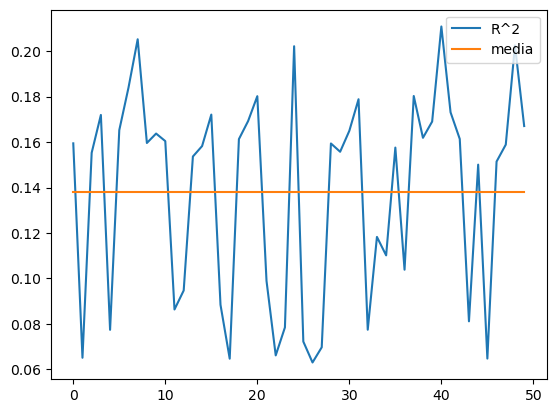

In [43]:
data = yf.download('GGAL', start='2000-01-01')
params = zip(lista_medias, lista_sigmas_f, lista_sigmas_s)

results_r2 = [modelar(data, ms, sf, ss).rsquared for ms, sf, ss in params]
df = pd.DataFrame(results_r2, columns=['R^2'])
df['media'] = df['R^2'].mean()
df.plot()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


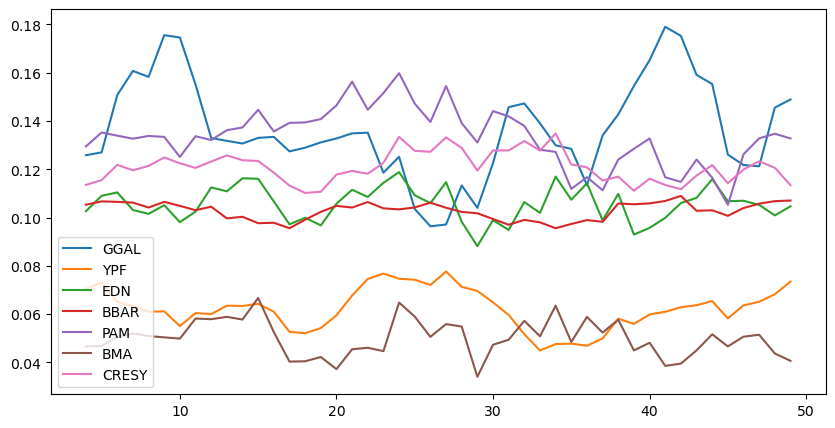

In [44]:
fig, ax = plt.subplots(figsize=(10,5))
tickers = ['GGAL','YPF','EDN','BBAR','PAM','BMA','CRESY']
params = zip(lista_medias, lista_sigmas_f, lista_sigmas_s)

for ticker in tickers:
    data = yf.download(ticker, start='2000-01-01')
    params = zip(lista_medias, lista_sigmas_f, lista_sigmas_s)
    results_r2 = [modelar(data, ms, sf, ss).rsquared for ms, sf, ss in params]
    df = pd.DataFrame(results_r2)
    ax.plot(df.rolling(5).mean(), label=ticker)
        
plt.legend()
plt.show()